In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [5]:
raw_data = pd.read_csv(r"Customer Churn Dataset.csv")

In [6]:
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
raw_data.drop("customerID", axis=1, inplace=True)

In [9]:
raw_data["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
raw_data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# As TotalCharges feature is having a dtype of Object but it should be float, so need to convert it to float
raw_data["TotalCharges"] = pd.to_numeric(raw_data["TotalCharges"], errors="coerce")

In [12]:
categorical_features = raw_data.select_dtypes(include="object").columns
numerical_features = raw_data.select_dtypes(exclude="object").columns

In [13]:
for i in categorical_features:
  print(i, ":", raw_data[i].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [14]:
raw_data[numerical_features].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
def cat_to_numeric():
  for i in categorical_features:
    raw_data[i] = LabelEncoder().fit_transform(raw_data[i])
  return raw_data

In [16]:
df = cat_to_numeric()

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [18]:
df.info()

## now all the features are converted to int or floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [19]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
df.dropna(inplace=True, axis=0)

In [21]:
## need to look over ["tenure",	"MonthlyCharges",	"TotalCharges"] as these are continous features

def kde_plot(feature):
  # Set a larger and cleaner plot style
  sns.set(style="whitegrid")

  # Create the KDE plot
  plt.figure(figsize=(10, 6))  # Adjust figure size
  sns.kdeplot(
      data=df,
      x=feature,
      hue="Churn",
      palette="coolwarm",  # Use a contrasting color palette
      fill=True,          # Fill under the KDE curve for better visual clarity
      common_norm=False,  # Ensure KDE for both classes are not normalized together
      alpha=0.7,          # Transparency for better visual layering
      linewidth=2         # Thicker line for better definition
  )

  # Add titles and labels
  plt.title(f'KDE Plot of {feature} by Churn Status', fontsize=16, fontweight='bold', pad=20)
  plt.xlabel(feature, fontsize=12, fontweight='bold')
  plt.ylabel('Density', fontsize=12, fontweight='bold')

  # Customize the legend to show labels for churn
  plt.legend(title='Churn', labels=['No Churn', 'Yes Churn'], title_fontsize='13', fontsize='11')

  # Add gridlines and styling
  plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

  # Show the plot
  plt.show()

In [22]:
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

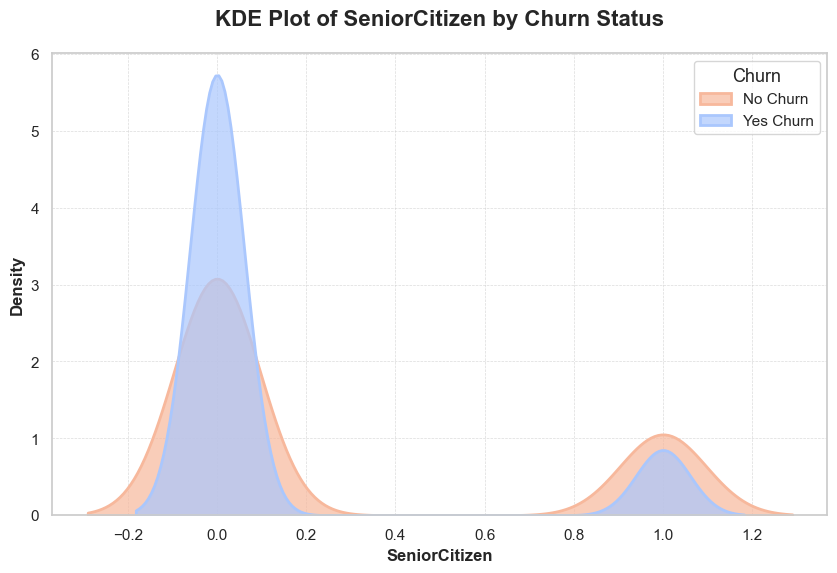

In [23]:
kde_plot("SeniorCitizen")

# from the graph I can coclude that the mostly other than SeniorCitizens are leaving

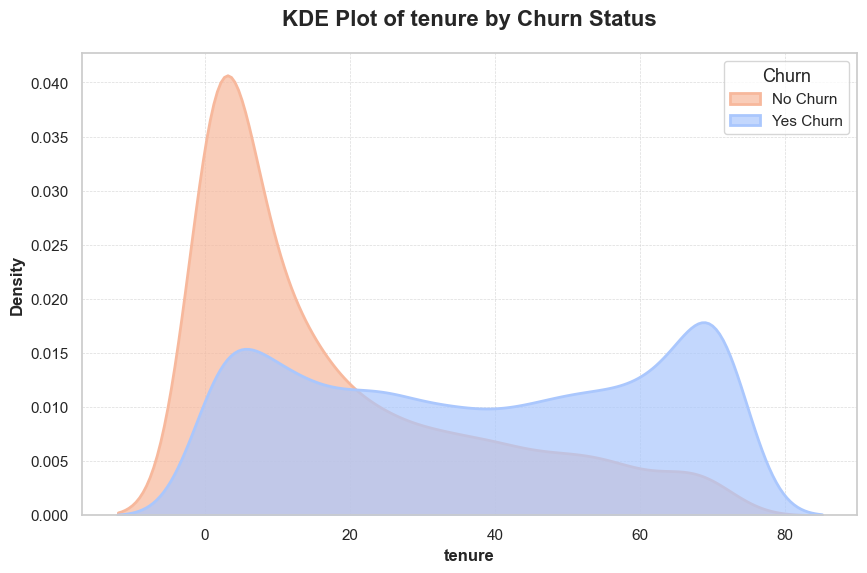

In [24]:
kde_plot("tenure")

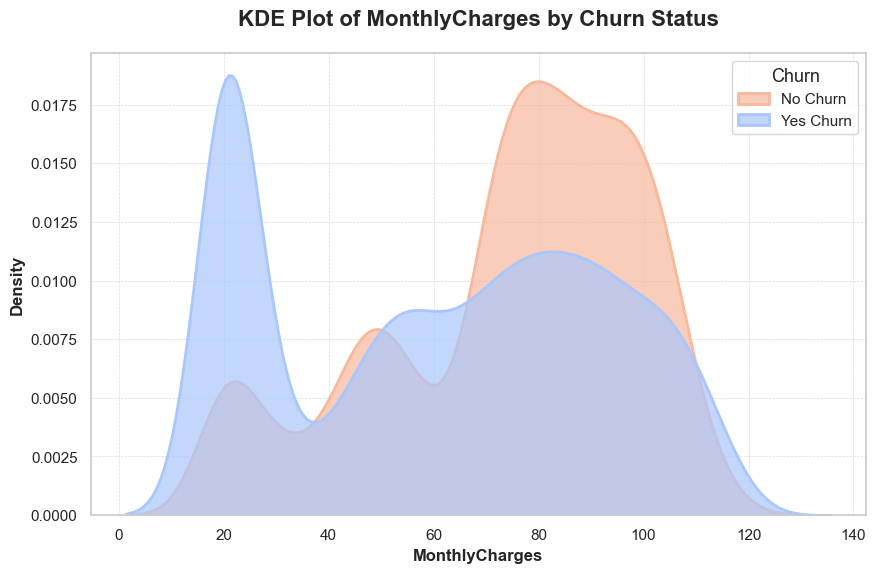

In [25]:
kde_plot("MonthlyCharges")

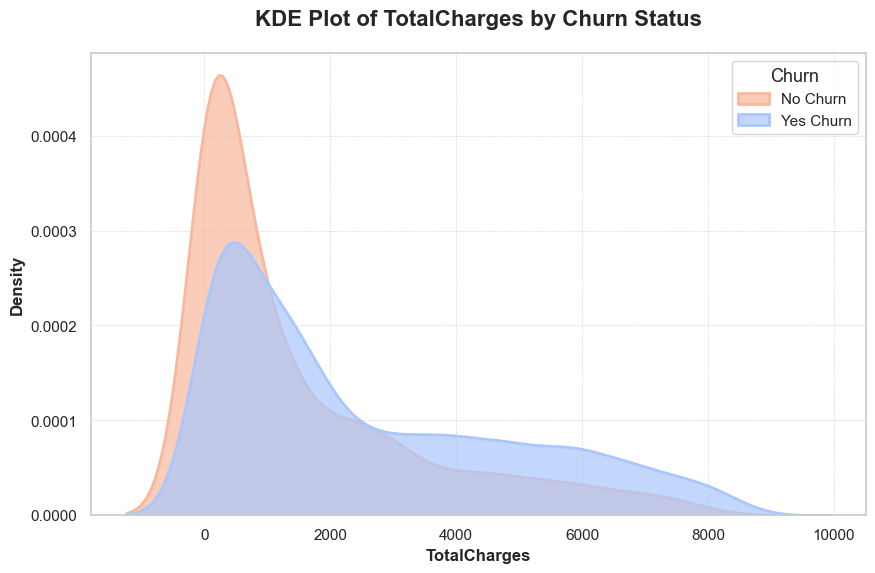

In [26]:
kde_plot("TotalCharges")

In [27]:
def boxplot(feature, df):
  # Create a boxplot
  plt.figure(figsize=(10, 6))
  sns.boxplot(data=df, x="Churn", y=feature, palette="coolwarm")
  # sns.boxplot(df[feature])

  # Add titles and labels
  plt.title(f'Boxplot of {feature} by Churn Status', fontsize=16, fontweight='bold', pad=20)
  plt.xlabel('Churn', fontsize=12, fontweight='bold')
  plt.ylabel(feature, fontsize=12, fontweight='bold')

  # Customize the legend to show labels for churn
  plt.legend(title='Churn', labels=['No Churn', 'Yes Churn'], title_fontsize='13', fontsize='11')

  # Show the plot
  plt.show()

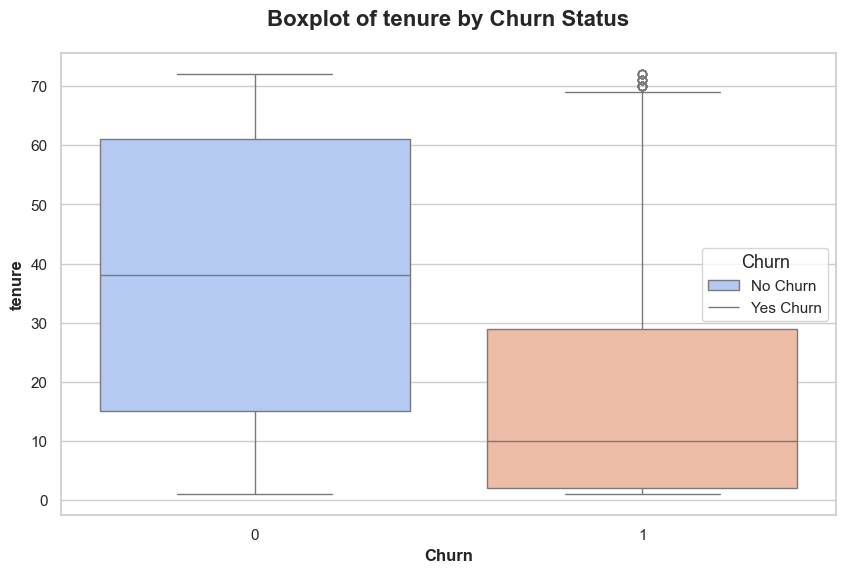

In [28]:
boxplot("tenure", df)

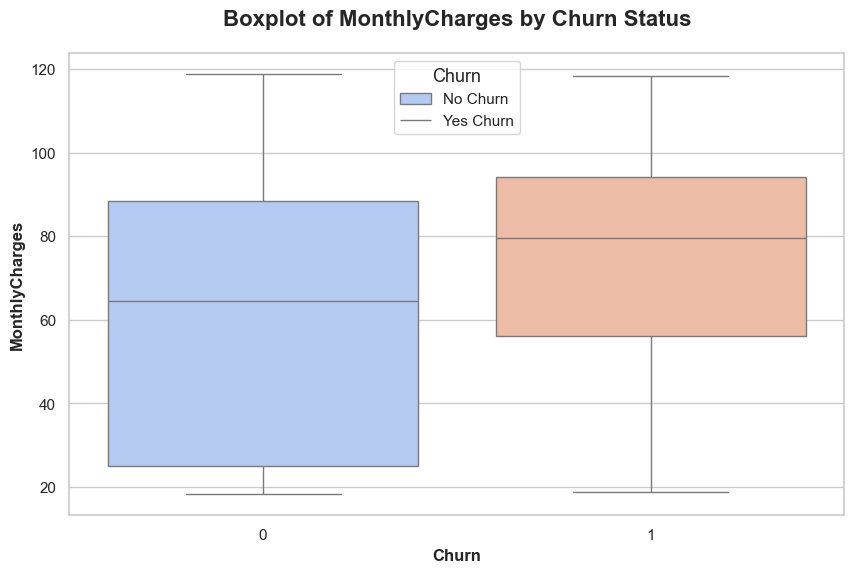

In [29]:
boxplot("MonthlyCharges", df)

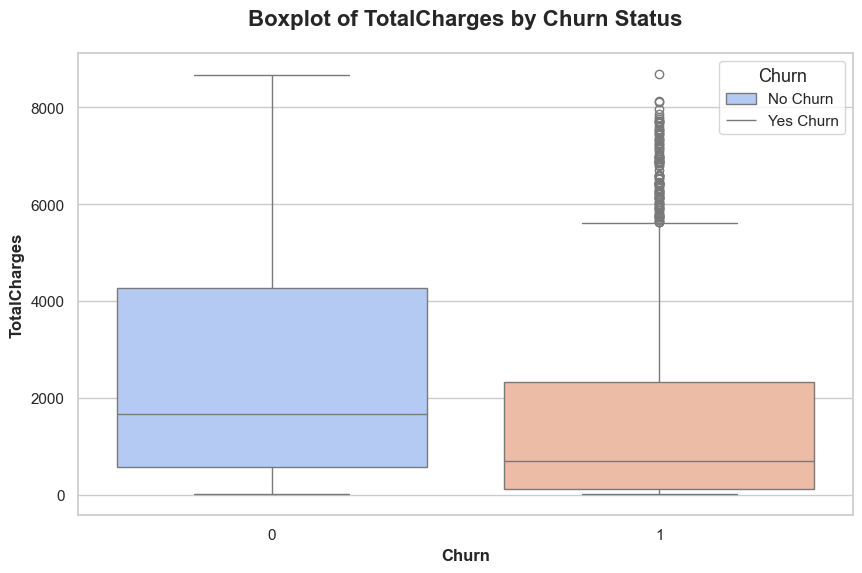

In [30]:
boxplot("TotalCharges", df)

In [31]:
df_filtered = df[~((df["Churn"] == 1) & (df["TotalCharges"] > 5700)) ]

In [32]:
df_filtered.shape

(6928, 20)

In [33]:
df_filtered.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [34]:
df_cleaned = df_filtered.copy()

In [35]:
def dist_plot(df, feature):
  sns.distplot(df[feature])
  plt.grid()
  plt.show()

In [36]:
cotinous_feature = ["tenure", "MonthlyCharges", "TotalCharges"]

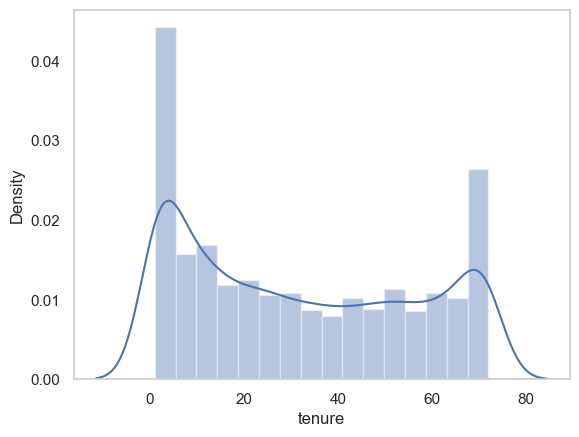

In [37]:
dist_plot(df_cleaned, "tenure")

# can be scaled by StandardScaler or Min-Max Scaler

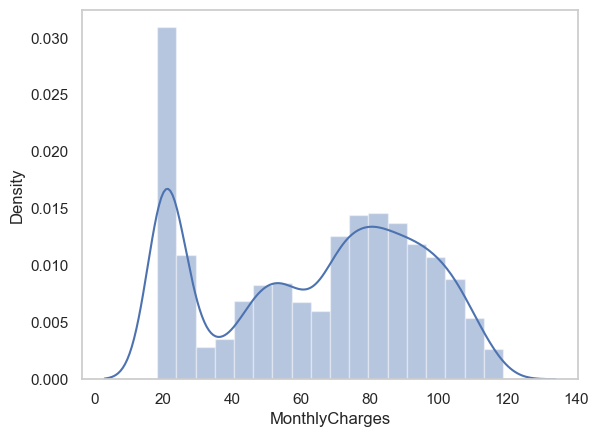

In [38]:
dist_plot(df_cleaned, "MonthlyCharges")

# can be transformed by power transformation i.e., Box-Cox Transformation

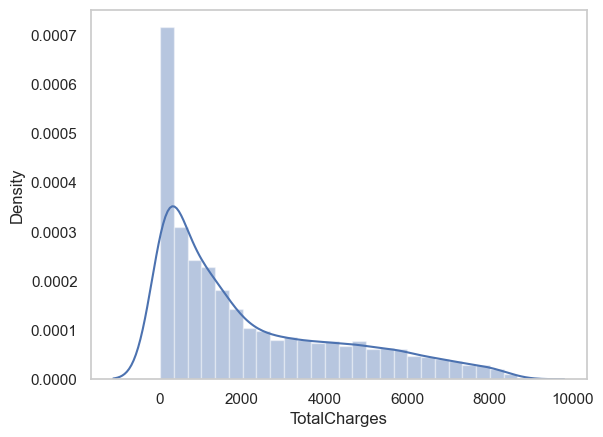

In [39]:
dist_plot(df_cleaned, "TotalCharges")

# need to scale by StandardScaler

In [40]:
# StandardScaler
std_scaler = StandardScaler()
# Min-Max Scaler
min_max_scaler = MinMaxScaler()
# Power Tranaformer
power_transformation = PowerTransformer(method="yeo-johnson")

In [41]:
# scaling the "tenure" feature with standardscaler
df_cleaned["tenure"] = std_scaler.fit_transform(df_cleaned[["tenure"]])
# scaling the "MonthlyCharges" feature with PowerTransformer
df_cleaned["MonthlyCharges"] = power_transformation.fit_transform(df_cleaned[["MonthlyCharges"]])
# scaling the "TotalCharges" feature with StandardScaler
df_cleaned["TotalCharges"] = std_scaler.fit_transform(df_cleaned[["TotalCharges"]])

In [42]:
df_cleaned.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.267931,0,1,0,0,2,0,0,0,0,0,1,2,-1.146428,-0.987110,0
1,1,0,0,0,0.084169,1,0,0,2,0,2,0,0,0,1,0,3,-0.218315,-0.147699,0
2,1,0,0,0,-1.226958,1,0,0,2,2,0,0,0,0,0,1,3,-0.322101,-0.951767,1
3,1,0,0,0,0.534869,0,1,0,2,0,2,2,0,0,1,0,0,-0.713657,-0.169704,0
4,0,0,0,0,-1.226958,1,0,1,0,0,0,0,0,0,0,1,2,0.236464,-0.932132,1


In [43]:
def count_plot(df, label):
  # Set the style and larger figure size
  sns.set(style="whitegrid")

  # Create the countplot
  plt.figure(figsize=(8, 5))
  sns.countplot(data=df, x=label, palette="coolwarm")  # Choose a palette for contrasting colors

  # Add title and labels
  plt.title('Customer Churn Distribution', fontsize=16, fontweight='bold', pad=20)
  plt.xlabel('Churn', fontsize=12, fontweight='bold')
  plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')

  # Add value labels on top of the bars
  for p in plt.gca().patches:
      plt.gca().annotate(f'{p.get_height()}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=11, color='black', fontweight='bold')

  # Show the plot
  plt.show()

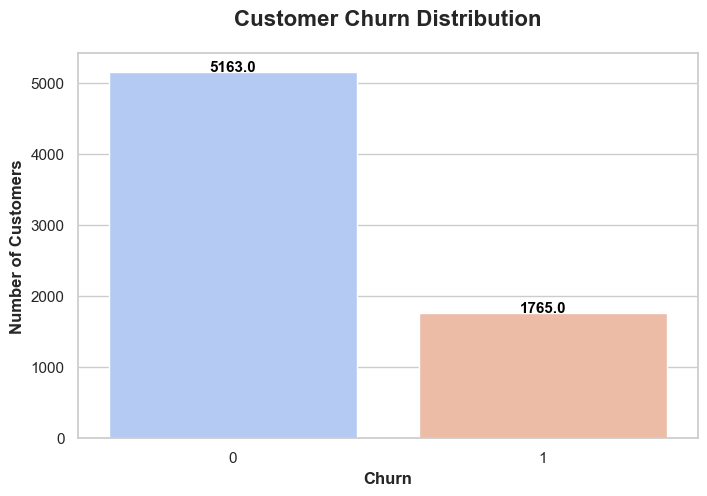

In [44]:
count_plot(df_cleaned, "Churn")

## The target feature is imbalanced so need to balance it
## I will be upsampling it, because there are very less datapoints due to it the model may underfit if we do Downsampling

In [45]:
inputs = df.drop("Churn", axis=1)
target = df["Churn"]

In [46]:
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size=0.2, random_state=369)

In [48]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [49]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [50]:
over_sampling = SMOTE(random_state=369)

In [51]:
# applying SMOTE to the training data
input_resampled, target_resampled = over_sampling.fit_resample(train_inputs, train_target)

In [52]:
input_resampled.shape, target_resampled.shape

((8276, 19), (8276,))

In [53]:
target_resampled.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

**Model Building**

In [54]:
# random-forest model
rf_model = RandomForestClassifier()
# gradient-boosting model
gb_model = GradientBoostingClassifier()
# xgboost classifier
# xgb = xgb.XGBClassifier()

In [55]:
rf_model.fit(input_resampled, target_resampled)

RandomForestClassifier()

In [56]:
train_results = rf_model.predict(input_resampled)

report = classification_report(target_resampled, train_results)
print(report)

# Random Forest Model is Overfitting

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276



In [57]:
gb_model.fit(input_resampled, target_resampled)

train_gb_results = gb_model.predict(input_resampled)

report = classification_report(target_resampled, train_gb_results)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4138
           1       0.83      0.88      0.85      4138

    accuracy                           0.85      8276
   macro avg       0.85      0.85      0.85      8276
weighted avg       0.85      0.85      0.85      8276



**Hyper Parameter Tuning**

In [58]:
n_estimators = [100, 125, 150, 175, 200, 225, 250]
max_depth = np.arange(3, 8, 1)
max_features = np.arange(1, 19)
max_samples = [0.5, 0.75]
ccp_alpha = [0.01, 0.03, 0.02]

## random forest parameters
rf_params = {
            "n_estimators": n_estimators,
            "max_depth":max_depth,
            "max_features":max_features,
            "max_samples":max_samples
}

## bradient boosting parameters
gb_params = {
            "n_estimators": n_estimators,
            "max_depth":max_depth,
            "max_features":max_features,
            "ccp_alpha":ccp_alpha
}

In [59]:
## randomforest tuning
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid=rf_params,
                       cv=6,
                       n_jobs=-1,
                       verbose=2)

## gradient boosting tuning
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid=gb_params,
                       n_jobs=-1,
                       cv=6,
                       verbose=2)

In [60]:
rf_grid.fit(input_resampled, target_resampled)

Fitting 6 folds for each of 1260 candidates, totalling 7560 fits


GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([3, 4, 5, 6, 7]),
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18]),
                         'max_samples': [0.5, 0.75],
                         'n_estimators': [100, 125, 150, 175, 200, 225, 250]},
             verbose=2)

In [61]:
rf_grid.best_params_

{'max_depth': 7, 'max_features': 15, 'max_samples': 0.75, 'n_estimators': 125}

In [62]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=7, max_features=15, max_samples=0.75,
                       n_estimators=125)

In [63]:
rf_grid.best_score_

0.8205848248223001

In [64]:
gb_grid.fit(input_resampled, target_resampled)

Fitting 6 folds for each of 1890 candidates, totalling 11340 fits


GridSearchCV(cv=6, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.01, 0.03, 0.02],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18]),
                         'n_estimators': [100, 125, 150, 175, 200, 225, 250]},
             verbose=2)

In [65]:
gb_grid.best_params_

{'ccp_alpha': 0.01, 'max_depth': 6, 'max_features': 1, 'n_estimators': 200}

In [66]:
gb_grid.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.01, max_depth=6, max_features=1,
                           n_estimators=200)

In [67]:
gb_grid.best_score_

0.7774374415402887

In [68]:
rf_grid_model = rf_grid.best_estimator_
gb_grid_model = gb_grid.best_estimator_

rf_grid_results = rf_grid_model.predict(input_resampled)
gb_grid_results = gb_grid_model.predict(input_resampled)

rf_grid_report = classification_report(target_resampled, rf_grid_results)
gb_grid_report = classification_report(target_resampled, gb_grid_results)

In [69]:
print(rf_grid_report)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4138
           1       0.82      0.89      0.85      4138

    accuracy                           0.85      8276
   macro avg       0.85      0.85      0.85      8276
weighted avg       0.85      0.85      0.85      8276



In [70]:
print(gb_grid_report)

              precision    recall  f1-score   support

           0       0.82      0.70      0.75      4138
           1       0.74      0.84      0.79      4138

    accuracy                           0.77      8276
   macro avg       0.78      0.77      0.77      8276
weighted avg       0.78      0.77      0.77      8276



In [73]:
rf_test_pred = rf_grid_model.predict(test_inputs)
rf_test_report = classification_report(test_target, rf_test_pred)
print(rf_test_report)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1025
           1       0.54      0.72      0.62       382

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407



In [81]:
rg_test_pred = gb_grid_model.predict(test_inputs)
gb_test_report = classification_report(test_target, rf_test_pred)
print(gb_test_report)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1025
           1       0.54      0.72      0.62       382

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407



**Final Model**

In [74]:
import pickle

In [76]:
pickle.dump(df_cleaned, open("df.pkl", "wb"))

In [77]:
pickle.dump(std_scaler, open("tenure_scaler.pkl", "wb"))
pickle.dump(power_transformation, open("monthlycharges_transformer.pkl", "wb"))
pickle.dump(std_scaler, open("totalcharges_scaler.pkl", "wb"))

In [82]:
pickle.dump(rf_grid_model, open("Model.pkl", "wb"))